# Promotion Analysis

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

In [18]:
# file_path = "/Users/apeksha/Desktop/Xtillion_Venmito/Venmito-apekshamalik/output_data/promotions_(linked).csv"
file_path = "/Users/alipuccio/Desktop/apex/Venmito-apekshamalik/output_data/promotions_(linked).csv"
promotions_df = pd.read_csv(file_path)

In [19]:
display(promotions_df.head())

,email,telephone_x,promotion,responded,telephone_y,first_name,last_name,city,country,id
0,alessandro.french@example.com,216-516-1958,Popsi,Yes,216-516-1958,Alessandro,French,NaN,Unknown,934
1,isobelle.davidson@example.com,NaN,Popsi,Yes,237-295-4490,Isobelle,Davidson,NaN,Unknown,530
2,steven.reid@example.com,490-977-4025,Popsi,Yes,490-977-4025,Steven,Reid,NaN,Unknown,296
3,caleb.obrien@example.com,223-387-1014,Krafty Cheddar,Yes,223-387-1014,Caleb,Obrien,Toronto,Canada,768
4,kyran.duncan@example.com,NaN,Oreoz,Yes,433-632-3326,Kyran,Duncan,NaN,Unknown,971


In [20]:
import tools
total_responses = promotions_df.groupby('promotion')['responded'].count()

# Count of Yes responses per promotion
yes_responses = promotions_df[promotions_df['responded'] == 'Yes'].groupby('promotion')['responded'].count()

# Percentage of Yes responses per promotion
response_rate = (yes_responses / total_responses * 100).fillna(0)

# Create summary DataFrame
promotion_summary = pd.DataFrame({
    'Total Responses': total_responses,
    'Yes Responses': yes_responses.fillna(0).astype(int),
    'Response Rate (%)': response_rate.round(2)
}).reset_index()

# Display table
# tools.display_dataframe_to_user(name="Promotion Performance Overview", dataframe=promotion_summary)
promotion_summary

,promotion,Total Responses,Yes Responses,Response Rate (%)
0,Coca-Splash,13,4,30.77
1,Colgatex,9,3,33.33
2,Dovee,16,7,43.75
3,Flixnet,9,2,22.22
4,GatorBoost,16,6,37.50
5,KittyKat,13,4,30.77
6,Krafty Cheddar,8,5,62.50
7,Oreoz,17,9,52.94
8,Popsi,17,11,64.71
9,RedCow,13,7,53.85


In [21]:
## Distribution of Promotions

/var/folders/t8/nqklvy6x565bg7rjp1gqrcl40000gn/T/ipykernel_36047/3103775431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=promotions_df["promotion"], palette="Blues_r", order=promotions_df["promotion"].value_counts().index)


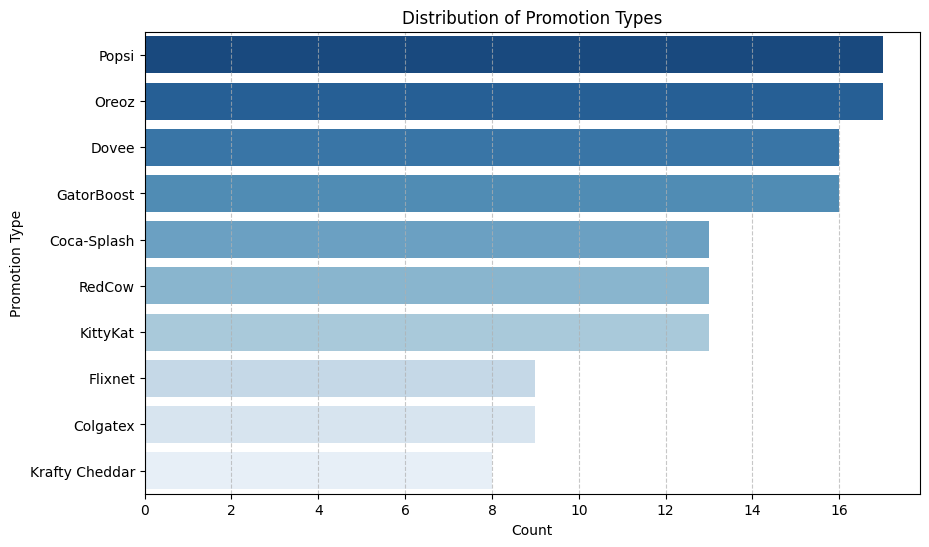

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y=promotions_df["promotion"], palette="Blues_r", order=promotions_df["promotion"].value_counts().index)

# Customize the plot
plt.xlabel("Count")
plt.ylabel("Promotion Type")
plt.title("Distribution of Promotion Types")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot

## Promotion Acceptance Breakdown

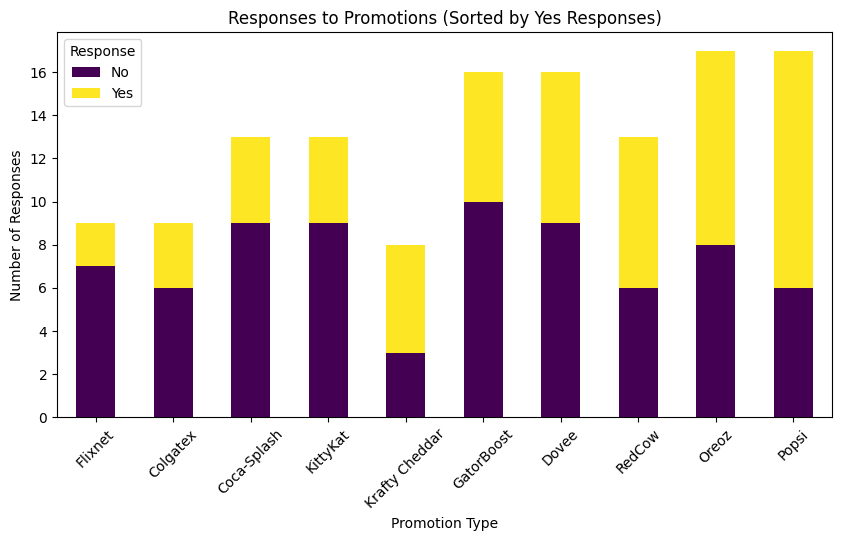

In [23]:
# Plot

# Sort promotions by total responses (sum of Yes and No)
response_summary = promotions_df.groupby(['promotion', 'responded']).size().unstack()

# Sort promotions by the number of "Yes" responses in ascending order
response_summary = response_summary.sort_values(by="Yes", ascending=True)

# Plot
response_summary.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.title("Responses to Promotions (Sorted by Yes Responses)")
plt.ylabel("Number of Responses")
plt.xlabel("Promotion Type")
plt.xticks(rotation=45)
plt.legend(title="Response", labels=["No", "Yes"])
plt.show()

# Overview 
-- Distribution
Popsi, Oreoz, and GatorBoost were the most widely distributed promotions.

-- Responses
Popsi and Oreoz had the highest acceptance rates, indicating strong customer interest.
Krafty Cheddar had the lowest acceptance rate, with significantly more "No" responses.
Promotions like Coca-Splash and KittyKat had mixed engagement, showing room for optimization.

# Rejections across region by promotion

In [38]:
# Create a dropdown for selecting a promotion
promotion_dropdown = widgets.Dropdown(
    options=promotions_df['promotion'].unique(),
    description="Promotion",
    value=promotions_df['promotion'].unique()[0]  # Default selection
)

# Output widget for displaying the plot
output = widgets.Output()

# Function to update the bar chart based on promotion selection
def update_chart(selected_promotion):
    with output:
        output.clear_output(wait=True)  # Clear previous output
        
        # Filter data for selected promotion
        filtered_data = promotions_df[promotions_df['promotion'] == selected_promotion]

        # Calculate rejection rates by country for the selected promotion
        country_rejection_rates = (
            filtered_data[filtered_data['responded'] == "No"]
            .groupby('country')
            .size()
            .reset_index(name='rejection_count')
        )

        # Calculate total responses per country to get percentages
        total_responses_per_country = filtered_data.groupby('country').size().reset_index(name='total_count')

        # Merge data to compute rejection rate percentage
        country_rejection_rates = country_rejection_rates.merge(total_responses_per_country, on='country', how='right')
        country_rejection_rates['rejection_count'] = country_rejection_rates['rejection_count'].fillna(0)
        country_rejection_rates['rejection_rate'] = (country_rejection_rates['rejection_count'] / country_rejection_rates['total_count']) * 100

        # Plot rejection rates by country as a bar chart
        plt.figure(figsize=(12, 6))
        sns.barplot(data=country_rejection_rates, x='country', y='rejection_rate', palette='Reds')

        plt.xlabel("Country", fontsize=12)
        plt.ylabel("Rejection Rate (%)", fontsize=12)
        plt.title(f"Rejection Rates by Country for {selected_promotion}", fontsize=14)
        plt.xticks(rotation=30, ha="right")
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.show()

# Attach the update function to dropdown value change
promotion_dropdown.observe(lambda change: update_chart(change['new']), names='value')

# Display the dropdown and output widget
display(widgets.VBox([promotion_dropdown, output]))

# Show initial chart
update_chart(promotion_dropdown.value)


# Promotion Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

In [ ]:
# file_path = "/Users/apeksha/Desktop/Xtillion_Venmito/Venmito-apekshamalik/output_data/promotions_(linked).csv"
file_path = "/Users/alipuccio/Desktop/apex/Venmito-apekshamalik/output_data/promotions_(linked).csv"
promotions_df = pd.read_csv(file_path)

In [ ]:
display(promotions_df.head())

,email,telephone_x,promotion,responded,telephone_y,first_name,last_name,city,country,id
0,alessandro.french@example.com,216-516-1958,Popsi,Yes,216-516-1958,Alessandro,French,NaN,Unknown,934
1,isobelle.davidson@example.com,NaN,Popsi,Yes,237-295-4490,Isobelle,Davidson,NaN,Unknown,530
2,steven.reid@example.com,490-977-4025,Popsi,Yes,490-977-4025,Steven,Reid,NaN,Unknown,296
3,caleb.obrien@example.com,223-387-1014,Krafty Cheddar,Yes,223-387-1014,Caleb,Obrien,Toronto,Canada,768
4,kyran.duncan@example.com,NaN,Oreoz,Yes,433-632-3326,Kyran,Duncan,NaN,Unknown,971


In [ ]:
import tools
total_responses = promotions_df.groupby('promotion')['responded'].count()

# Count of Yes responses per promotion
yes_responses = promotions_df[promotions_df['responded'] == 'Yes'].groupby('promotion')['responded'].count()

# Percentage of Yes responses per promotion
response_rate = (yes_responses / total_responses * 100).fillna(0)

# Create summary DataFrame
promotion_summary = pd.DataFrame({
    'Total Responses': total_responses,
    'Yes Responses': yes_responses.fillna(0).astype(int),
    'Response Rate (%)': response_rate.round(2)
}).reset_index()

# Display table
# tools.display_dataframe_to_user(name="Promotion Performance Overview", dataframe=promotion_summary)
promotion_summary

,promotion,Total Responses,Yes Responses,Response Rate (%)
0,Coca-Splash,13,4,30.77
1,Colgatex,9,3,33.33
2,Dovee,16,7,43.75
3,Flixnet,9,2,22.22
4,GatorBoost,16,6,37.50
5,KittyKat,13,4,30.77
6,Krafty Cheddar,8,5,62.50
7,Oreoz,17,9,52.94
8,Popsi,17,11,64.71
9,RedCow,13,7,53.85


In [ ]:
## Distribution of Promotions

## Promotion Acceptance Breakdown

# Overview 
-- Distribution
Popsi, Oreoz, and GatorBoost were the most widely distributed promotions.

-- Responses
Popsi and Oreoz had the highest acceptance rates, indicating strong customer interest.
Krafty Cheddar had the lowest acceptance rate, with significantly more "No" responses.
Promotions like Coca-Splash and KittyKat had mixed engagement, showing room for optimization.

# Promotion acceptances by country

In [40]:
%matplotlib inline

# Convert response to numeric
promotions_df['response_numeric'] = promotions_df['responded'].map({'Yes': 1, 'No': 0})

# Aggregate acceptance rate per country and promotion
promotion_acceptance = promotions_df.groupby(['country', 'promotion'])['response_numeric'].mean().reset_index()

# Dropdown for selecting a country
country_dropdown = widgets.Dropdown(
    options=promotions_df['country'].unique(),
    description="Country",
    value=promotions_df['country'].unique()[0]  # Default selection
)

# Function to update the chart based on selection
def update_chart(selected_country):
    # Clear previous output
    plt.clf()

    # Filter data for selected country
    filtered_data = promotion_acceptance[promotion_acceptance['country'] == selected_country]

    # Create a new figure
    plt.figure(figsize=(10, 5))
    sns.barplot(x='promotion', y='response_numeric', data=filtered_data, palette='Set2')

    plt.xlabel("Promotion Type", fontsize=12)
    plt.ylabel("Acceptance Rate (%)", fontsize=12)
    plt.title(f"Promotion Acceptance Rate in {selected_country}", fontsize=14, pad=20)
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1)

    # Add percentage labels without overlapping title
    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width()/2, p.get_height() + 0.03, f"{p.get_height()*100:.1f}%", 
                 ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Display the widget
display(widgets.VBox([country_dropdown, widgets.interactive_output(update_chart, {'selected_country': country_dropdown})]))

# Rejections in region by promotion

In [43]:
# Create a dropdown for selecting a promotion
promotion_dropdown = widgets.Dropdown(
    options=promotions_df['promotion'].unique(),
    description="Promotion",
    value=promotions_df['promotion'].unique()[0]  # Default selection
)

# Function to update the rejection chart based on selected promotion
def update(promotion):
    # Filter data for selected promotion
    filtered_df = promotions_df[promotions_df['promotion'] == promotion]

    # Calculate rejection rates by country for the selected promotion
    country_rejection_rates = (
        filtered_df[filtered_df['responded'] == "No"]
        .groupby('country')
        .size()
        .reset_index(name='rejection_count')
    )

    # Calculate total responses per country to get percentages
    total_responses_per_country = filtered_df.groupby('country').size().reset_index(name='total_count')

    # Merge data to compute rejection rate percentage
    country_rejection_rates = country_rejection_rates.merge(total_responses_per_country, on='country', how='right')
    country_rejection_rates['rejection_count'] = country_rejection_rates['rejection_count'].fillna(0)
    country_rejection_rates['rejection_rate'] = (country_rejection_rates['rejection_count'] / country_rejection_rates['total_count']) * 100

    # Plot rejection rates by country as a bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(country_rejection_rates['country'], country_rejection_rates['rejection_rate'], color='red', alpha=0.7)
    plt.xlabel("Country")
    plt.ylabel("Rejection Rate (%)")
    plt.title(f"Rejection Rates by Country for {promotion}")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Display the interactive dropdown
interactive_plot = widgets.interactive(update, promotion=promotion_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Promotion', options=('Popsi', 'Krafty Cheddar', 'Oreoz', 'Colgatex…